In [2]:
import nltk
import spacy
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to
[nltk_data]     /home/mohamedismail/nltk_data...
[nltk_data] Downloading package punkt to
[nltk_data]     /home/mohamedismail/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/mohamedismail/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
df=pd.read_csv('/home/mohamedismail/Documents/codesoft/SPAM SMS DETECTION/spam.csv',encoding="ISO-8859-1")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
df=df[['v1','v2']]

In [6]:
column_mapping = {'v1': 'label',
                  'v2': 'message'}

df = df.rename(columns=column_mapping)

In [7]:
df.shape

(5572, 2)

In [8]:
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# Data Cleaning

In [10]:
# Tokenization
df['tokens'] = df['message'].apply(word_tokenize)

# Removing Stop Words
!python -m spacy download en_core_web_sm


/bin/bash: /home/mohamedismail/anaconda3/lib/libtinfo.so.6: no version information available (required by /bin/bash)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 194.2 kB/s eta 0:00:0000:0100:02
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [11]:
# Removing Stop Words
stop_words = set(stopwords.words('english'))
df['tokens'] = df['tokens'].apply(lambda x: [word for word in x if word.lower() not in stop_words])

# Join tokens into a single string
df['tokens'] = df['tokens'].apply(lambda x: ' '.join(x))

# Lemmatization
nlp = spacy.load('en_core_web_sm')

def lemmatize_text_spacy(text):
    doc = nlp(text)
    return [token.lemma_ for token in doc]

df['tokens'] = df['tokens'].apply(lemmatize_text_spacy)

In [12]:
df['message']=df['tokens'].apply(lambda x: ' '.join(x))
df.head()

,label,message,tokens
0,ham,"go jurong point , crazy .. available bugis n g...","[go, jurong, point, ,, crazy, .., available, b..."
1,ham,ok lar ... joke wif u oni ...,"[ok, lar, ..., joke, wif, u, oni, ...]"
2,spam,free entry 2 wkly comp win FA Cup final tkts 2...,"[free, entry, 2, wkly, comp, win, FA, Cup, fin..."
3,ham,u dun say early hor ... u c already say ...,"[u, dun, say, early, hor, ..., u, c, already, ..."
4,ham,"Nah not think go usf , live around though","[Nah, not, think, go, usf, ,, live, around, th..."


In [13]:
df.describe()

,label,message,tokens
count,5572,5572,5572
unique,2,5147,5147
top,ham,"sorry , will call later","[sorry, ,, will, call, later]"
freq,4825,30,30


# Exploratory Data Analysis (EDA)

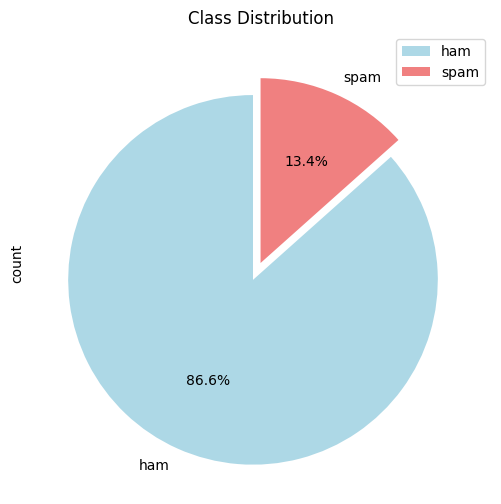

In [14]:
class_distribution = df['label'].value_counts()

plt.figure(figsize=(8, 6))
class_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=90, explode=(0.1, 0), colors=['lightblue', 'lightcoral'])
plt.title('Class Distribution')


plt.legend(labels=class_distribution.index, loc="best")

plt.show()


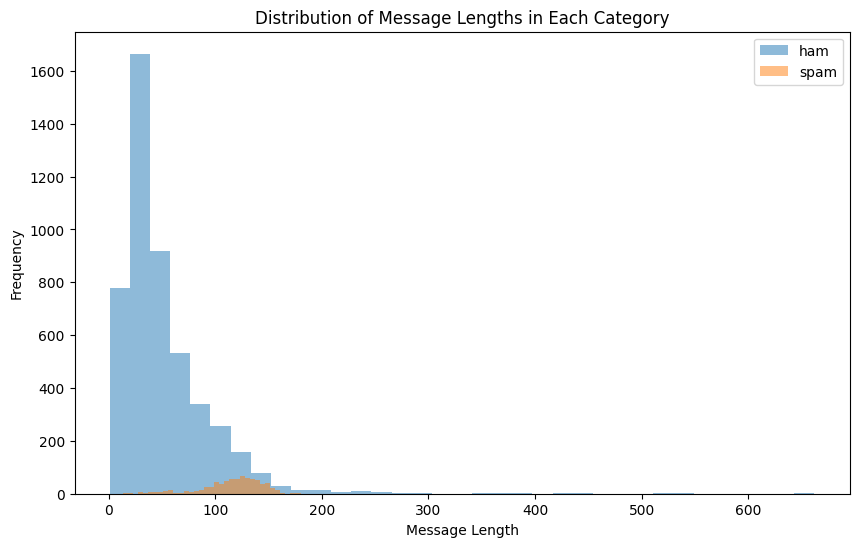

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

In [15]:
plt.figure(figsize=(10, 6))
df['message_length'] = df['message'].apply(len)
df.groupby('label')['message_length'].plot(bins=35 ,kind='hist', alpha=0.5, legend=True)
plt.xlabel('Message Length')
plt.title('Distribution of Message Lengths in Each Category')
plt.show()

plt.figure(figsize=(12, 8))

<Figure size 800x600 with 0 Axes>

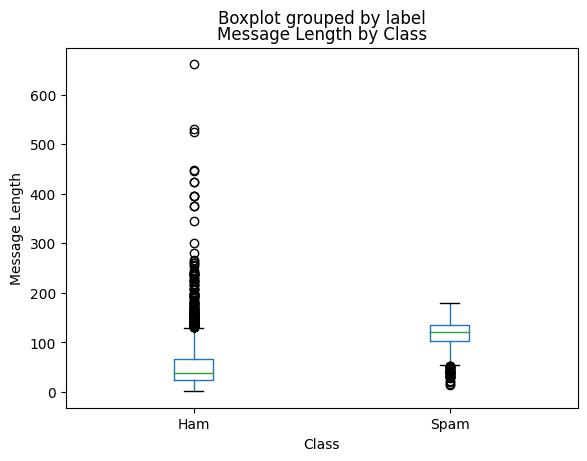

In [16]:
plt.figure(figsize=(8, 6))
df.boxplot(column='message_length', by='label', grid=False)
plt.title('Message Length by Class')
plt.xlabel('Class')
plt.ylabel('Message Length')
plt.xticks([1, 2], ['Ham', 'Spam'])
plt.show()

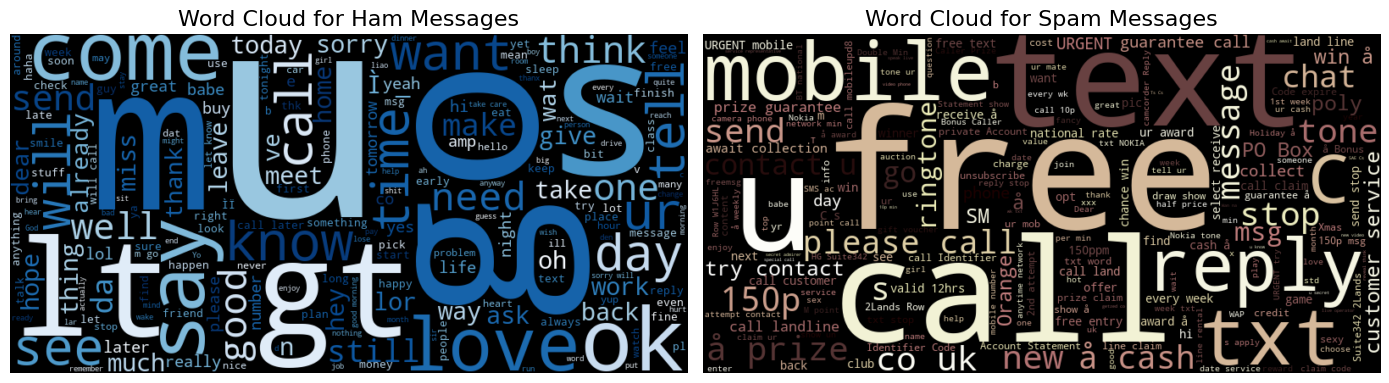

In [17]:
ham_words = ' '.join(df[df['label'] == 'ham']['message'])
spam_words = ' '.join(df[df['label'] == 'spam']['message'])


wordcloud_ham = WordCloud(width=800, height=400, colormap='Blues').generate(ham_words)
wordcloud_spam = WordCloud(width=800, height=400, colormap='pink').generate(spam_words)

plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.imshow(wordcloud_ham, interpolation='bilinear')
plt.title('Word Cloud for Ham Messages', fontsize=16)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_spam, interpolation='bilinear')
plt.title('Word Cloud for Spam Messages', fontsize=16)
plt.axis('off')

plt.tight_layout()
plt.show()


# Dimensionality Reduction 

### TF-IDF 

In [18]:
X = df['message']
y = df['label']

tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(X)

tfidf_features = tfidf_vectorizer.get_feature_names_out()
X_tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf_features)

# Concatenate X_tfidf_df with the 'label' column from df
merged_df = pd.concat([X_tfidf_df, df['label']], axis=1)

In [19]:
merged_df

,00,000,000pes,008704050406,0089,0121,01223585236,01223585334,0125698789,02,...,ìï,û_thanks,ûªm,ûªt,ûªve,ûï,ûïharry,ûò,ûówell,label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ham
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ham
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,spam
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ham
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ham
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5567,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,spam
5568,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ham
5569,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ham
5570,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ham


In [20]:
first_row = merged_df.iloc[0]

non_zero_columns = [column for column, value in first_row.items() if value != 0]
print("Columns not containing zero in the first row:")
print(non_zero_columns)

Columns not containing zero in the first row:
['amore', 'available', 'buffet', 'bugis', 'cine', 'crazy', 'get', 'go', 'great', 'jurong', 'la', 'point', 'wat', 'world', 'label']


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Step 1: Split the data into features (X) and labels (y)
X = merged_df.drop(columns=['label'])
y = merged_df['label']

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Train the SVM classifier
svm_classifier = SVC(kernel='linear')  # You can choose the kernel type based on your preference
svm_classifier.fit(X_train, y_train)


SVC(kernel='linear')

In [23]:
# Step 4: Evaluate the classifier
y_pred = svm_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.979066985645933


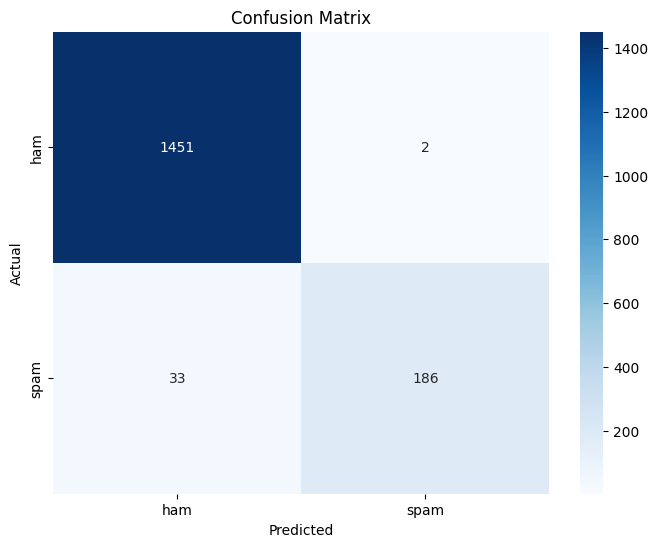

In [25]:
from sklearn.metrics import confusion_matrix, classification_report

import matplotlib.pyplot as plt
import seaborn as sns

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Define class labels
class_names = ['ham', 'spam']

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()




In [26]:
# Generate classification report
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      1453
        spam       0.99      0.85      0.91       219

    accuracy                           0.98      1672
   macro avg       0.98      0.92      0.95      1672
weighted avg       0.98      0.98      0.98      1672



### Linear discriminant analysis

In [27]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Assuming you have your DataFrame df with 'message' and 'label' columns
X = df['message']
y = df['label']

# Create a CountVectorizer instance
count_vectorizer = CountVectorizer()

# Fit the CountVectorizer to the data and transform the data into a Bag of Words representation
X_bow = count_vectorizer.fit_transform(X)

# Get the feature names (words) in the vocabulary
bow_features = count_vectorizer.get_feature_names_out()

# Convert the Bag of Words representation into a DataFrame
X_bow_df = pd.DataFrame(X_bow.toarray(), columns=bow_features)

# Concatenate X_bow_df with the 'label' column from df
merged_df = pd.concat([X_bow_df, df['label']], axis=1)
merged_df

,00,000,000pes,008704050406,0089,0121,01223585236,01223585334,0125698789,02,...,ìï,û_thanks,ûªm,ûªt,ûªve,ûï,ûïharry,ûò,ûówell,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ham
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ham
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,spam
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ham
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ham
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5567,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,spam
5568,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ham
5569,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ham
5570,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ham


In [28]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Assuming you already have merged_df DataFrame
X = merged_df.drop(columns=['label']).values
y_numerical = merged_df['label'].values  

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_numerical, test_size=0.3, random_state=42)

# Perform Linear Discriminant Analysis
lda = LinearDiscriminantAnalysis(n_components=1)
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)




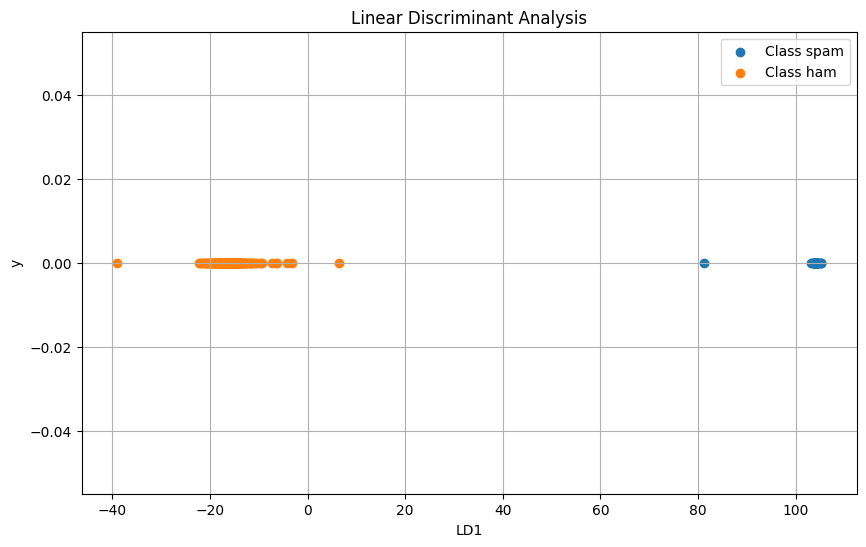

In [29]:
# Manually plot the classes along the first discriminant axis
plt.figure(figsize=(10, 6))
for label_value in set(y_train):
    X_lda_label = X_train_lda[y_train == label_value]
    plt.scatter(X_lda_label, [0] * len(X_lda_label), label=f'Class {label_value}')

plt.xlabel('LD1')
plt.ylabel('y')
plt.title('Linear Discriminant Analysis')
plt.legend()
plt.grid(True)
plt.show()

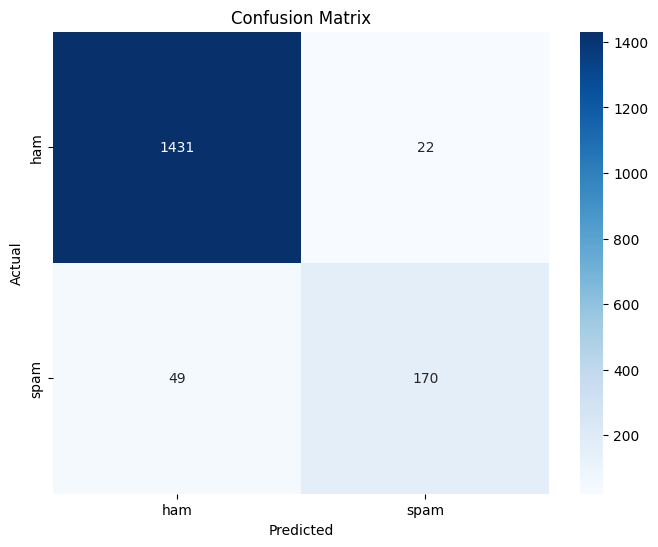

In [31]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Train SVM classifier on the LDA-transformed data
svm = SVC(kernel='linear')
svm.fit(X_train_lda, y_train)

# Make predictions on the LDA-transformed test data
y_pred = svm.predict(X_test_lda)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Define class labels
class_names = ['ham', 'spam']

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()



In [32]:
# Generate classification report
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)



Classification Report:
              precision    recall  f1-score   support

         ham       0.97      0.98      0.98      1453
        spam       0.89      0.78      0.83       219

    accuracy                           0.96      1672
   macro avg       0.93      0.88      0.90      1672
weighted avg       0.96      0.96      0.96      1672

